In [6]:
%matplotlib notebook

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, Image, HTML
from __future__ import division
import numpy as np
#import glob
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import plot2
import ephem
from matplotlib.ticker import Formatter, FixedFormatter, FixedLocator
from matplotlib import text


In [7]:
# import data files (sessions A-D for P2780 Arecibo timing observations and all msps from Dunc's list are below)

psr_positions_a = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/Arecibo/ao_a_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_b = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/Arecibo/ao_b_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_c = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/Arecibo/ao_c_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_d = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/Arecibo/ao_d_sess_nano_sources_12-2017.txt', usecols=(0,1))
psr_positions_msps = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/Arecibo/duncs_list_all_msps_excludeAOsessions_1-2018.txt', usecols=(0,1))
gcenter = np.loadtxt('/Users/Zach/Desktop/ARCC/nanograv_plots/GBT/galactic_center.txt', usecols=(0,1))

c_a = SkyCoord(ra=psr_positions_a[:,0]*u.degree, dec=psr_positions_a[:,1]*u.degree, frame='icrs')
c_b = SkyCoord(ra=psr_positions_b[:,0]*u.degree, dec=psr_positions_b[:,1]*u.degree, frame='icrs')
c_c = SkyCoord(ra=psr_positions_c[:,0]*u.degree, dec=psr_positions_c[:,1]*u.degree, frame='icrs')
c_d = SkyCoord(ra=psr_positions_d[:,0]*u.degree, dec=psr_positions_d[:,1]*u.degree, frame='icrs')
c_msps = SkyCoord(ra=psr_positions_msps[:,0]*u.degree, dec=psr_positions_msps[:,1]*u.degree, frame='icrs')
gc = SkyCoord(ra=gcenter[0]*u.degree, dec=gcenter[1]*u.degree, frame='icrs')

#print c_a.ra.radian, c_a.dec.radian
#print c_b.ra.radian, c_b.dec.radian
#print c_c.ra.radian, c_c.dec.radian
#print c_d.ra.radian, c_d.dec.radian
#print c_msps.ra.radian, c_msps.dec.radian


In [8]:
#Define galactic plane function

def plot_mwd(RA,Dec, org = 0, projection='astro mollweide'):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    
    x = SkyCoord(ra=RA*u.degree, dec=Dec*u.degree, frame='icrs')# reverse the scale: East to the left
    #tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    #tick_labels = np.remainder(tick_labels+360+org,360)
#     fig = plt.figure(figsize=(10, 5))
#     ax = fig.add_subplot(111, projection=projection, axisbg ='LightCyan')
    ax.plot(x.ra.radian,x.dec.radian,
               color='k', linestyle='--', linewidth=2.25, label="Galactic plane", zorder=0)  
#     ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
#     ax.set_title(title)
#     ax.title.set_fontsize(15)
#     ax.set_xlabel("RA")
#     ax.xaxis.label.set_fontsize(12)
#     ax.set_ylabel("Dec")
#     ax.yaxis.label.set_fontsize(12)
#     ax.grid(True)

<IPython.core.display.Javascript object>


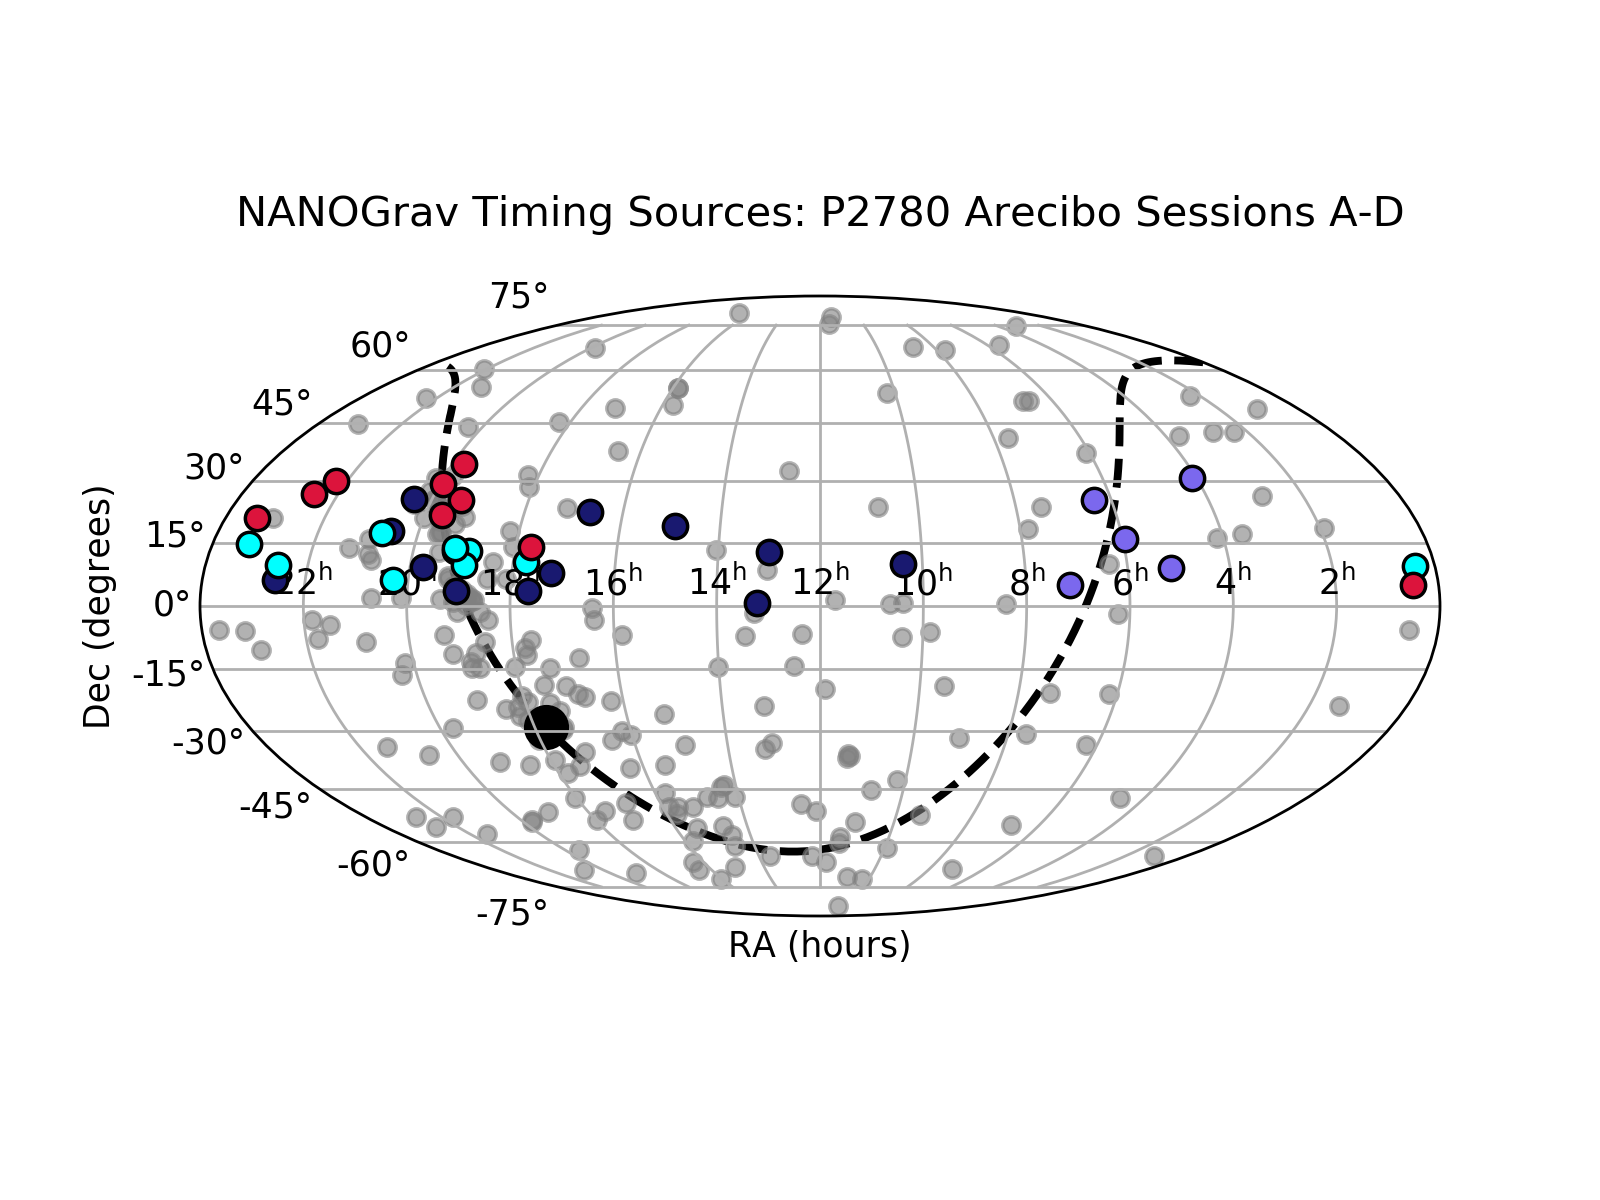

In [9]:
# create projection
ax = plt.subplot(111, projection='astro mollweide')
#ax.grid()


# this makes text easier to see on dark colors 
#plot2.outline_text(ax)

# flip map
#h_upper_f = h_upper[flipid]

# add galactic plane
lon_array = np.arange(0,360)
lat = 0.
eq_array = np.zeros((360,2))
for lon in lon_array:
    ga = ephem.Galactic(np.radians(lon), np.radians(lat))
    eq = ephem.Equatorial(ga)
    eq_array[lon] = np.degrees(eq.get())
RA = eq_array[:,0]
RA = np.roll(RA,243) #use np.roll to avoid unwanted horizontal line with ax.plot
Dec = eq_array[:,1]
Dec = np.roll(Dec,243) #ditto

#plot_mwd(RA, Dec)


# add pulsars
def update_plot(a_sess, b_sess, c_sess, d_sess, all_msps, gplane, gc_sess):
    
    ax.clear()
    if a_sess:
        ax.plot(c_a.ra.radian,c_a.dec.radian,'.', color="midnightblue", markersize=14, mec='k', label="'A' session sources")
    if b_sess:
        ax.plot(c_b.ra.radian,c_b.dec.radian,'.', color="cyan", markersize=14, mec='k', label="'B' session sources")
    if c_sess:
        ax.plot(c_c.ra.radian,c_c.dec.radian,'.', color="crimson", markersize=14, mec='k', label="'C' session sources")
    if d_sess:
        ax.plot(c_d.ra.radian,c_d.dec.radian,'.', color="mediumslateblue", markersize=14, mec='k', label="'D' session sources")
    if all_msps:
        ax.plot(c_msps.ra.radian,c_msps.dec.radian,'.', color="grey", markersize=10, alpha=0.6, zorder=1, label="All known msp's")
    if gplane:
        plot_mwd(RA, Dec)
    if gc_sess:
        ax.plot(gc.ra.radian,gc.dec.radian, 'o', color="black", markersize=12, mec='k', zorder=1)

    ax.grid()
    ax.set_xlabel("RA (hours)")
    ax.set_ylabel("Dec (degrees)")
    plt.title('NANOGrav Timing Sources: P2780 Arecibo Sessions A-D', y=1.08)    
        
#add legend
#leg = plt.legend(bbox_to_anchor=(1.07,0.5), loc="center left", borderaxespad=0)

plt.show()

#plt.savefig('/Users/Zach/Desktop/nanograv_plots/ao_nano_sessions_projection_12-2017.png')

In [10]:
a_sess = widgets.ToggleButton(
    value=False,
    description='A session sources',
    disabled=False,
    button_style='success',
    icon=''
)
b_sess = widgets.ToggleButton(
    value=False,
    description='B session sources',
    disabled=False,
    button_style='success',
    icon=''
)
c_sess = widgets.ToggleButton(
    value=False,
    description='C session sources',
    disabled=False,
    button_style='success',
    icon=''
)
d_sess = widgets.ToggleButton(
    value=False,
    description='D session sources',
    disabled=False,
    button_style='success',
    icon=''
)
all_msps = widgets.ToggleButton(
    value=False,
    description="All Known msp's",
    disabled=False,
    button_style='info',
    icon=''
)
gplane = widgets.ToggleButton(
    value=False,
    description='Draw Galactic Plane',
    disabled=False,
    button_style='info',
    icon=''
)
gc_sess = widgets.ToggleButton(
    value=False,
    description='Show Galactic Center',
    disabled=False,
    button_style='info',
    icon=''
)
 
widgets.interactive(update_plot, a_sess=a_sess, b_sess=b_sess, c_sess=c_sess, d_sess=d_sess, all_msps=all_msps, gplane=gplane, gc_sess=gc_sess)

A Jupyter Widget